Saving movie_watch.csv to movie_watch (2).csv
Dataset preview:
   watch_time_hour genre_preference  avg_rating_given
0               13           action          2.037554
1                4           comedy          1.350365
2               15         thriller          1.359665
3               14         thriller          1.772998
4               14           comedy          1.202237


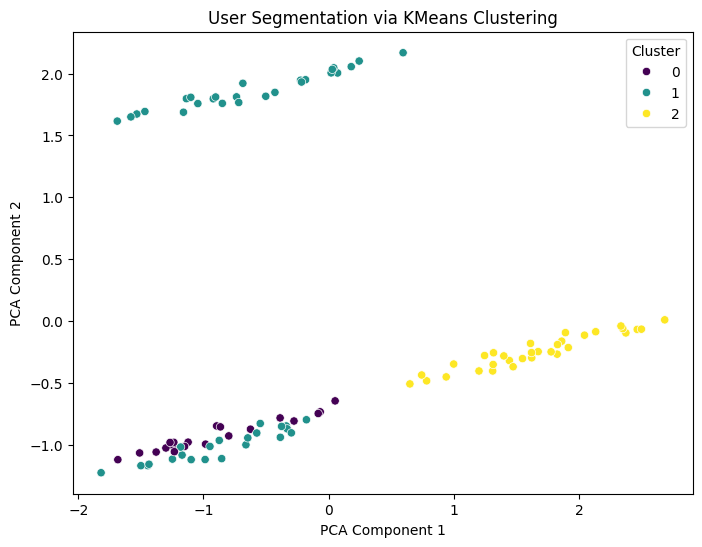


Clustered data saved to segmented_users.csv


In [5]:
# ✅ SEGMENTATION & CLUSTERING (For Non-Classification Data)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Upload the file
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))
print("Dataset preview:")
print(df.head())

# Step 1: Encode the categorical column
df_encoded = pd.get_dummies(df, columns=['genre_preference'])

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 4: Add the cluster label to the DataFrame
df['Cluster'] = clusters

# Step 5: Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Step 6: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis')
plt.title('User Segmentation via KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Optional: Save clustered data
df.to_csv("segmented_users.csv", index=False)
print("\nClustered data saved to segmented_users.csv")
